# Reference: 나도코딩 - 파이썬 코딩 무료 강의 (활용편6) https://youtu.be/XK3eU9egll8

In [1]:
!pip install opencv-python

Mounted at /gdrive


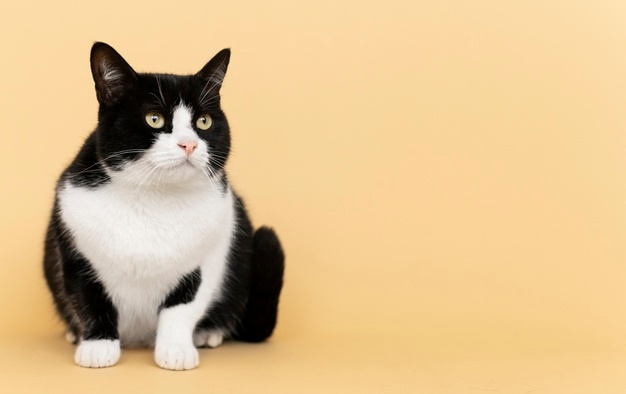

In [3]:
import cv2
import numpy as np
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

img_path = '/gdrive/MyDrive/CS/Image Classifier/ImageCat/cat0.jpg'
img = cv2.imread(img_path)

try:
    cv2.imshow(img)
except:
    from google.colab.patches import cv2_imshow
    cv2_imshow(img)

## Canny Detection

cv2.Canny(image, minVal, maxVal)
픽셀값의 변화(gradient)가 
1. maxVal보다 크다면, 윤곽선에 포함
2. minVal과 maxVal 사이라면 주변 픽셀이 윤곽선에 포함인지 확인
3. minVal보다 작다면, 포함하지 않음


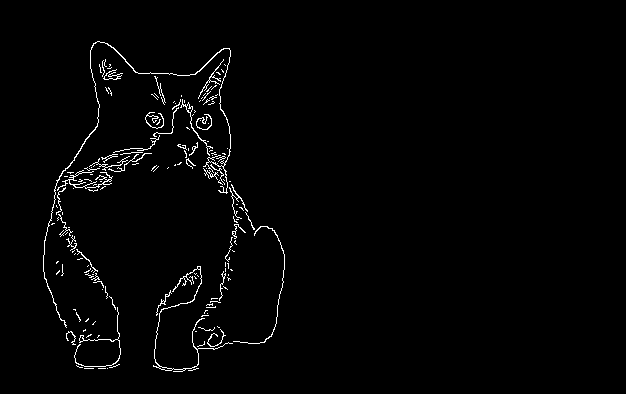

In [5]:
# canny detection
canny = cv2.Canny(img, 150, 200)
cv2_imshow(canny)

## Contours
cv2.findContours(이미지, 윤곽선 찾는 모드, 윤곽선 찾을 때 사용하는 근사치 방법)

### 윤곽선 찾기 모드
1. cv2.RETR_EXTERNAL: 가장 외곽의 윤곽선만 찾음
2. cv2.RETR_LIST: 모든 윤곽선 찾음(계층 정보 x)
3. cv2.RETR_TREE: 모든 윤곽선 찾음(계층 정보를 트리 구조로)

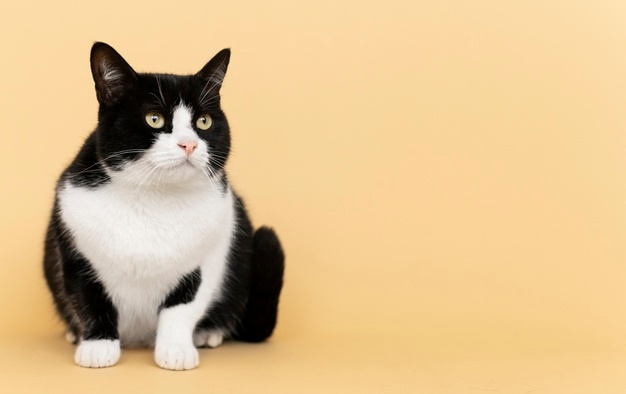

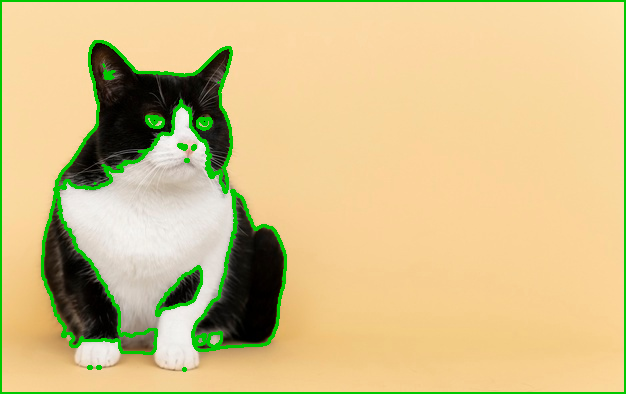

In [18]:
target_img = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

COLOR = (0, 200, 0) # color green
cv2.drawContours(target_img, contours, -1, COLOR, 2)

cv2_imshow(img)
cv2_imshow(target_img)

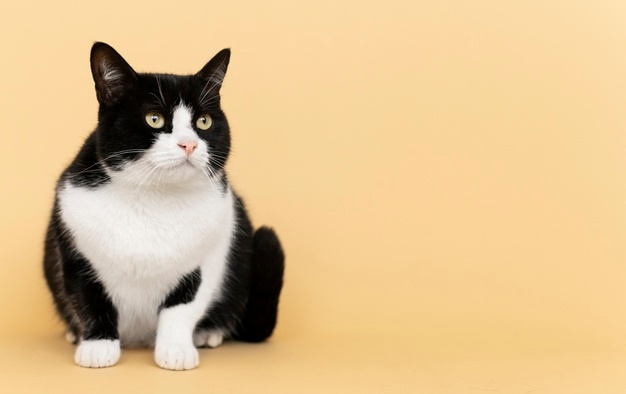

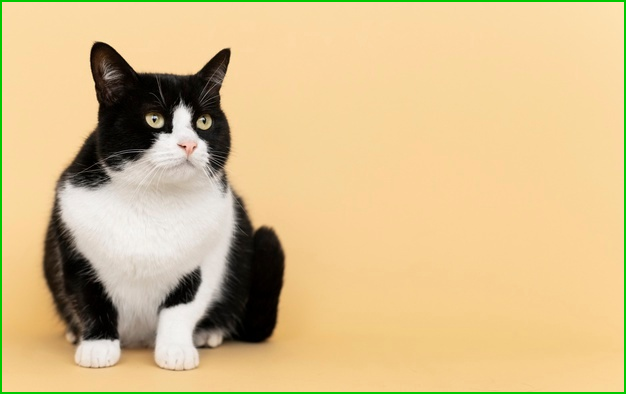

In [17]:
# RETR_EXTERNAL
target_img = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(otsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

COLOR = (0, 200, 0) # color green
cv2.drawContours(target_img, contours, -1, COLOR, 2)

cv2_imshow(img)
cv2_imshow(target_img)

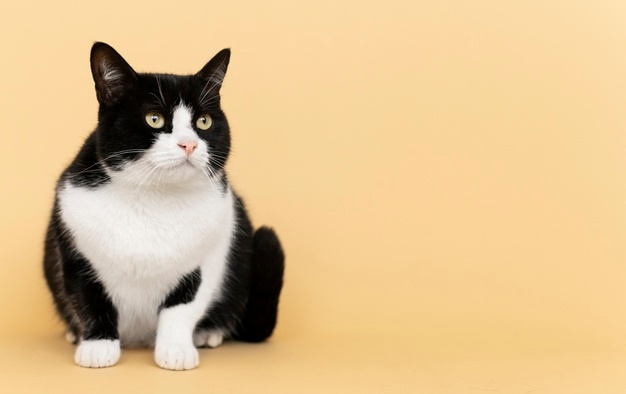

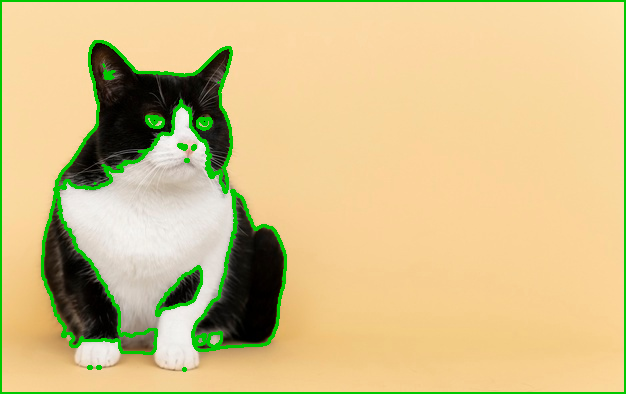

In [32]:
# RETR_TREE
target_img = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# contours.pop(0)    # this removes the most external contour

COLOR = (0, 200, 0) # color green
cv2.drawContours(target_img, contours, -1, COLOR, 2)

cv2_imshow(img)
cv2_imshow(target_img)

### boundingBox

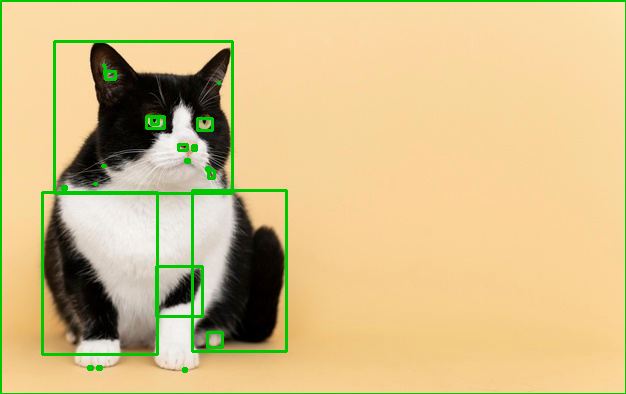

In [15]:
img = cv2.imread(img_path)
target_img = img.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

COLOR = (0, 200, 0)

for cnt in contours:
    x, y, width, height = cv2.boundingRect(cnt)
    cv2.rectangle(target_img, (x, y), (x + width, y + height), COLOR, 2)

cv2_imshow(target_img)

## Question

###1) 사진을 32 * 32로 줄여서 bounding box를 그린다면?

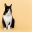

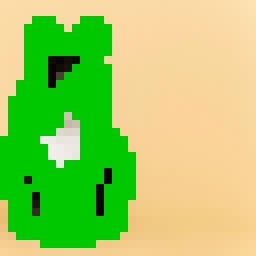

In [63]:
# Draw Contours

img = cv2.imread(img_path)
target_img = cv2.resize(img.copy(), dsize=(32, 32), interpolation=cv2.INTER_AREA)

cv2_imshow(target_img)

gray = cv2.cvtColor(target_img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

COLOR = (0, 200, 0) # color green
cv2.drawContours(target_img, contours, -1, COLOR, 2)

target_img = cv2.resize(target_img, dsize=(256, 256), interpolation=cv2.INTER_AREA)
cv2_imshow(target_img)

### 2) 결과를 보면 가장 외곽선은 사진 전체를 감싸는 선이다.
(배경도 사진으로 인식) 

최외곽선을 지우고 나머지 윤곽선을 통틀어서 bounding box를 설정한다면?

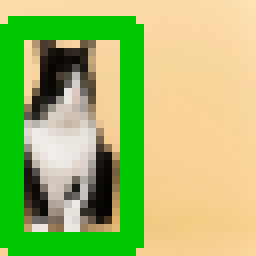

In [87]:
# Draw Contours

img = cv2.imread(img_path)
target_img = cv2.resize(img.copy(), dsize=(32, 32), interpolation=cv2.INTER_AREA)

gray = cv2.cvtColor(target_img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours.pop(0) # RETR_TREE이므로 0번째는 최외곽선임

COLOR = (0, 200, 0) # color green

# integrate contours
contour = contours[0]

for cnt in contours[1:]:
    contour=  np.concatenate((contour, cnt), axis=0)

x, y, width, height = cv2.boundingRect(contour)
cv2.rectangle(target_img, (x, y), (x + width, y + height), COLOR, 2)

target_img = cv2.resize(target_img, dsize=(256, 256), interpolation=cv2.INTER_AREA)
cv2_imshow(target_img)

### 3) 2의 방법을 큰 사진에 적용하면?

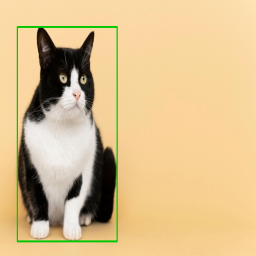

In [91]:
# Draw Contours

img = cv2.imread(img_path)
target_img = img.copy()

gray = cv2.cvtColor(target_img, cv2.COLOR_BGR2GRAY)
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours.pop(0) # RETR_TREE이므로 0번째는 최외곽선임

COLOR = (0, 200, 0) # color green

# integrate contours
contour = contours[0]

for cnt in contours[1:]:
    contour=  np.concatenate((contour, cnt), axis=0)

x, y, width, height = cv2.boundingRect(contour)
cv2.rectangle(target_img, (x, y), (x + width, y + height), COLOR, 2)

target_img = cv2.resize(target_img, dsize=(256, 256), interpolation=cv2.INTER_AREA)
cv2_imshow(target_img)